# Coursework 1: Image filtering

In this coursework you will practice image filtering techniques, which are commonly used to smooth, sharpen or add certain effects to images. 
The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and text answers, and upload the pdf file onto [Cate](https://cate.doc.ic.ac.uk).

## Dependencies:

If you do not have Jupyter-Lab on your laptop, you can find information for installing Jupyter-Lab [here](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html).

There may be certain Python packages you may want to use for completing the coursework. We have provided examples below for importing libraries. If some packages are missing, you need to install them. In general, new packages (e.g. imageio etc) can be installed by running 

`pip3 install [package_name]`

in the terminal. If you use Anaconda, you can also install new packages by running `conda install [package_name]` or using its graphic user interface.

In [1]:
# Import libaries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time 

## 1. Moving average filter (20 points).

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3 and 11x11 respectively. Perform image filtering on the noisy image.

Design the kernel of the filter by yourself. Then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

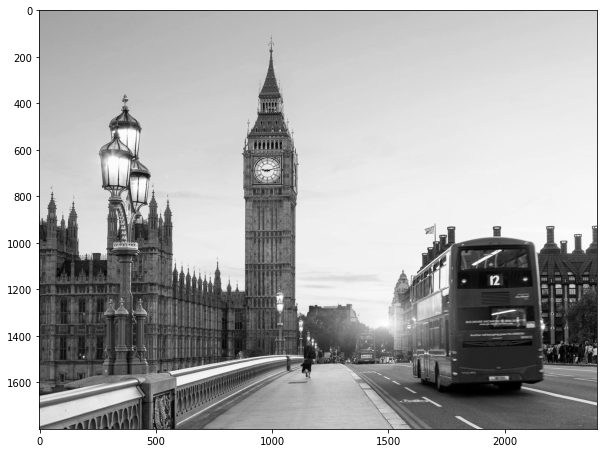

In [3]:
# Read the image (provided)
image = imageio.imread('london.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(10, 8)

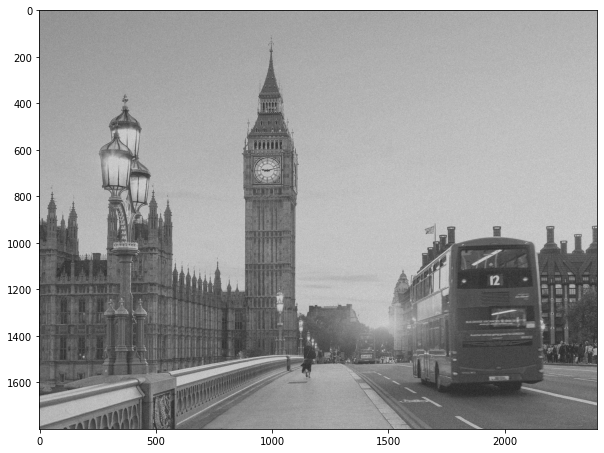

In [4]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results. (5 points)

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


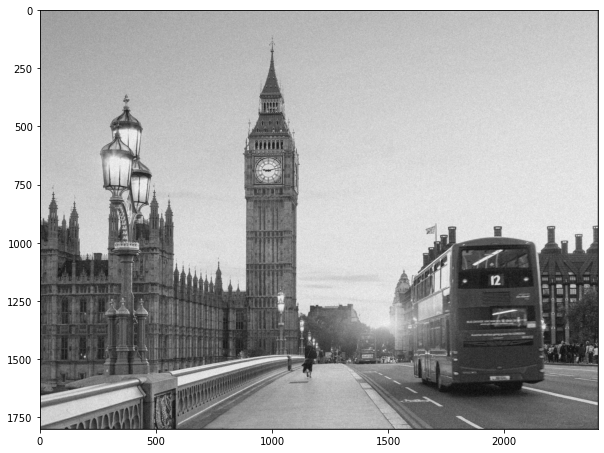

In [5]:
# Design the filter h
size = 3
h = (np.ones(size**2).reshape(size,size))/(size**2)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy,h)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter. (5 points)

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

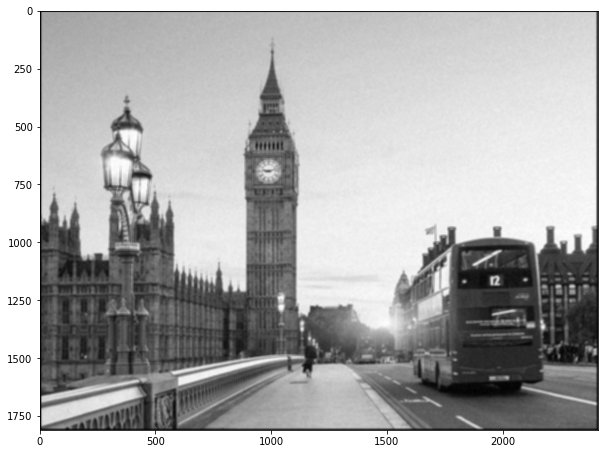

In [6]:
# Design the filter h
size = 11
h = (np.ones(size**2).reshape(size,size))/(size**2)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy,h)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results? (10 points)

The greater the kernal size, the blurrier the image has become (details lost by averaging from a bigger area), and the greater the computational cost (bigger matrix to convolve on each pixel). The computational complexity of a 3x3 moving average filter is 9N^2 multiplication (N is the image dimension), while that for a 11x11 moving average filter is 121N^2 multiplication.

## 2. Edge detection (65 points).

Perform edge detection using Sobel filters, as well as Gaussian + Sobel filters for edge detection.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image. (10 points)

h_sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
h_sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


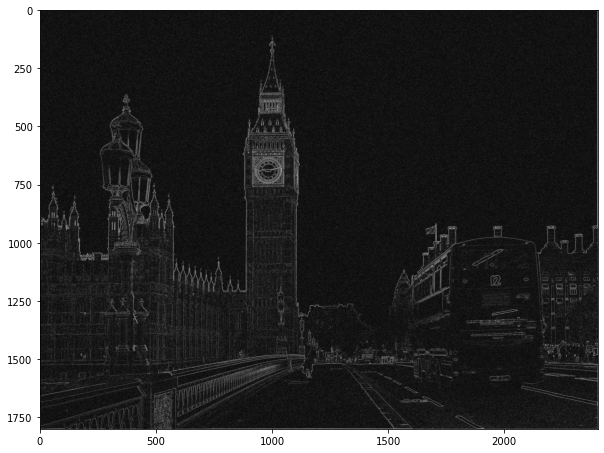

In [7]:
# Design the Sobel filters
h_sobel_x = (np.matrix([1, 2, 1]).reshape(3,1))*(np.matrix([1, 0, -1]).reshape(1,3))
h_sobel_y = (np.matrix([1, 0, -1]).reshape(3,1))*(np.matrix([1, 2, 1]).reshape(1,3))

# Sobel filtering
gx = scipy.signal.convolve2d(image_noisy,h_sobel_x)
gy = scipy.signal.convolve2d(image_noisy,h_sobel_y)

# Calculate the gradient magnitude
sobel_mag = np.sqrt(gx**2 + gy**2)

# Print the filters (provided)
print('h_sobel_x:')
print(h_sobel_x)
print('h_sobel_y:')
print(h_sobel_y)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$. (10 points)

[[2.18877727e-06 5.62818780e-06 1.29503244e-05 2.66647659e-05
  4.91292301e-05 8.10004066e-05 1.19503190e-04 1.57767249e-04
  1.86379983e-04 1.97027451e-04 1.86379983e-04 1.57767249e-04
  1.19503190e-04 8.10004066e-05 4.91292301e-05 2.66647659e-05
  1.29503244e-05 5.62818780e-06 2.18877727e-06]
 [5.62818780e-06 1.44722345e-05 3.33002627e-05 6.85653639e-05
  1.26330137e-04 2.08283185e-04 3.07288642e-04 4.05680249e-04
  4.79254587e-04 5.06633320e-04 4.79254587e-04 4.05680249e-04
  3.07288642e-04 2.08283185e-04 1.26330137e-04 6.85653639e-05
  3.33002627e-05 1.44722345e-05 5.62818780e-06]
 [1.29503244e-05 3.33002627e-05 7.66231016e-05 1.57767249e-04
  2.90682601e-04 4.79254587e-04 7.07063757e-04 9.33460473e-04
  1.10275325e-03 1.16575106e-03 1.10275325e-03 9.33460473e-04
  7.07063757e-04 4.79254587e-04 2.90682601e-04 1.57767249e-04
  7.66231016e-05 3.33002627e-05 1.29503244e-05]
 [2.66647659e-05 6.85653639e-05 1.57767249e-04 3.24843349e-04
  5.98516549e-04 9.86786964e-04 1.45584689e-03 1.9

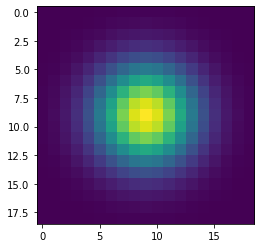

In [8]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    # return: a 2D array for the Gaussian kernel
    
    #3 sigmas would include 99.7 percent of data
    x = np.arange(-3*sigma, 3*sigma+1)
    y = np.arange(-3*sigma, 3*sigma+1)
    xd, yd = np.meshgrid(x, y)
    h = np.exp(- (xd**2 + yd**2)/(2 * sigma**2))/(2*(np.pi)* sigma**2)
    
    #normalise the filter so sum is 1
    if (h.sum() != 1):
        h /= h.sum()
        
    return h

# Visualise the Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
print(h)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Sobel filtering, show the gradient magnitude image. (7 points)

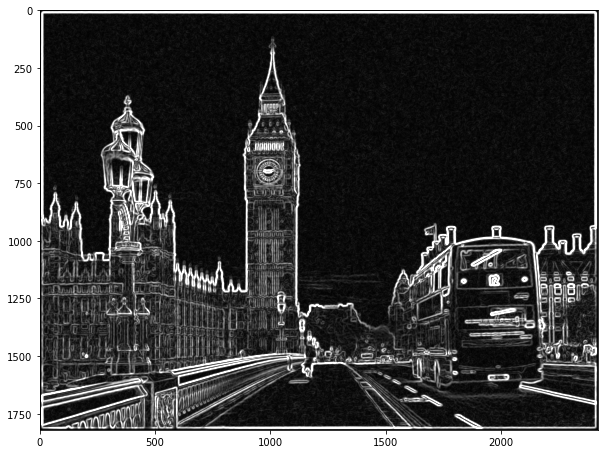

In [10]:
# Perform Gaussian smoothing before Sobel filterin
image_filtered = scipy.signal.convolve2d(image_noisy,h)

# Sobel filtering
gx = scipy.signal.convolve2d(image_filtered,h_sobel_x)
gy = scipy.signal.convolve2d(image_filtered,h_sobel_y)

# Calculate the gradient magnitude
sobel_mag = np.sqrt(gx**2 + gy**2)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering. (9 points)

Computational time: 16.738521019000018 s


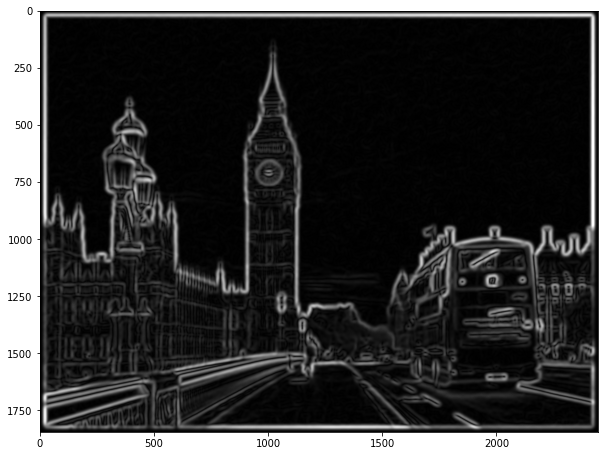

In [12]:
# Construct the Gaussian filter
h = gaussian_filter_2d(7)

# Perform Gaussian smoothing and count time
start = time.perf_counter()
image_filtered = scipy.signal.convolve2d(image_noisy,h)
elapsed = (time.perf_counter() - start)
print("Computational time:", elapsed, "s")  

# Sobel filtering
gx = scipy.signal.convolve2d(image_filtered,h_sobel_x)
gy = scipy.signal.convolve2d(image_filtered,h_sobel_y)

# Calculate the gradient magnitude
sobel_mag = np.sqrt(gx**2 + gy**2)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.5 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively. (10 points)

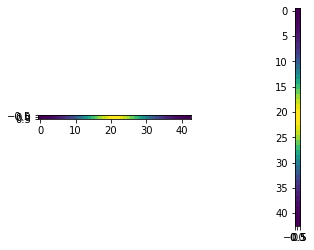

In [13]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    
    x = np.arange(-3*sigma, 3*sigma+1)
    h = np.exp(- (x**2)/(2 * sigma**2))/(np.sqrt(2*(np.pi))*sigma)
    
    #normalise the filter
    if (h.sum() != 1):
        h /= h.sum()
        
    return h

# sigma = 7 pixel (provided)
sigma = 7

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(sigma).reshape(1,6*sigma+1)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = gaussian_filter_1d(sigma).reshape(6*sigma+1,1)

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing (sigma = 7 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering and show results. (9 points)

Computational time: 0.2577064149999728 s


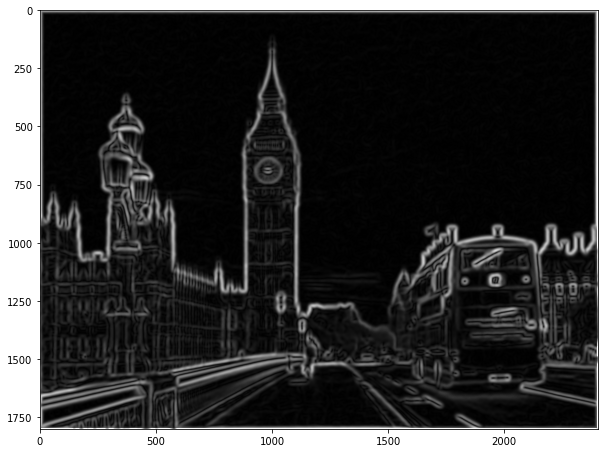

In [14]:
# Perform separable Gaussian smoothing and count time
start = time.perf_counter()
image_filtered = scipy.signal.convolve(image_noisy,h_x,mode='same')
image_filtered = scipy.signal.convolve(image_filtered,h_y,mode='same')
elapsed = (time.perf_counter() - start)
print("Computational time:", elapsed, "s")  

# Sobel filtering
gx = scipy.signal.convolve2d(image_filtered,h_sobel_x)
gy = scipy.signal.convolve2d(image_filtered,h_sobel_y)

# Calculate the gradient magnitude
sobel_mag = np.sqrt(gx**2 + gy**2)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time. (10 points)

Gaussian smoothing (a low-pass de-noising filter) before sobel filtering can reduce noises in the image and the effects of noises on gradient magnitude(changes in image): the filtered image in 2.3(Gaussian + Sobel) had clearer and more intense (compared to background) edges than the filtered image in 2.1 (only Sobel). 

Convolving the image on a 2D Gaussian filter, with a computational complexity of O(K^2 * N^2)(where N is the image dimension and K is the filter dimension) took 16.738521019000018 s on my laptop while convolving the image on two 1D Guassian filter on the x-axis and y-axis respectively achieved the same result and was also faster: only 0.2577064149999728 s. This is because Gaussian filters are separable and the computational complexity of two 1D Gaussian filters is O(K * N^2). This difference between computational time also increases with sigma.

## 3. Challenge: Implement the 3x3 moving average filter using Pytorch. (15 points)

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [15]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (5 points)

In [16]:
# Expand the dimension of the numpy array
image_input = np.expand_dims(image_noisy, axis=(0, 1))

# Convert to a Pytorch tensor using torch.from_numpy
image_tensor = torch.from_numpy(image_input).float()

### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 3x3 moving averaging filter. (5 points)

In [17]:
# Create the Conv2D filter (provided)
conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)

# Set the kernel weight
conv.weight = torch.nn.Parameter(torch.ones(1, 1, 3, 3)/(3**2))

### 3.3 Apply the filter to the noisy image tensor and display the output image. (5 points)

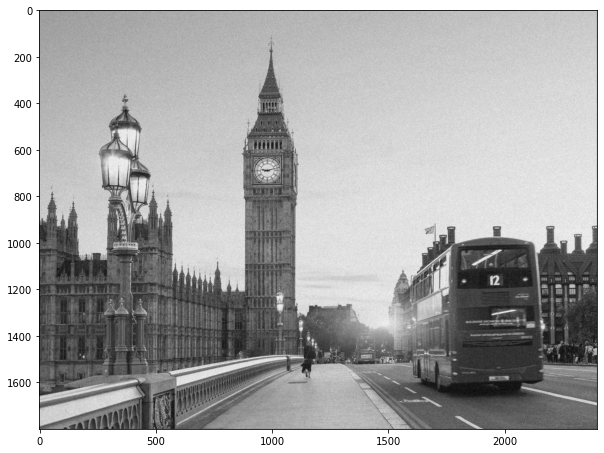

In [18]:
# Filtering
#image_tensor2 = image_tensor.detach()
image_output = conv(image_tensor)
image_filtered = image_output.detach().numpy()
image_filtered = np.squeeze(image_filtered, axis=(0,1))

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

## 4. Survey: How long does it take you to complete the coursework?

In [ ]:
4 hours + 2 hours checking everything correct